# IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# DATA VISUALIZATION

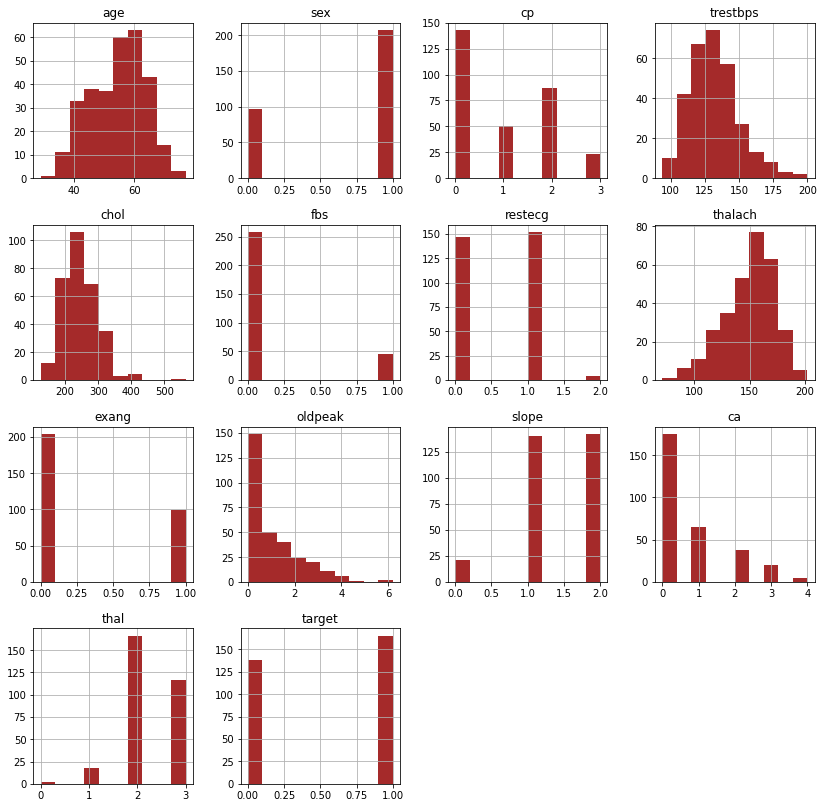

In [9]:
df.hist(figsize=(14,14),color = 'brown')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


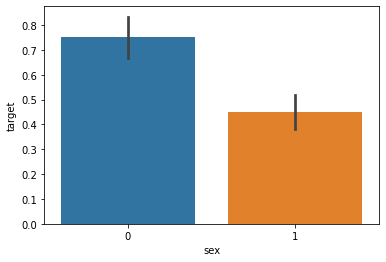

In [10]:
sns.barplot(df['sex'],df['target'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


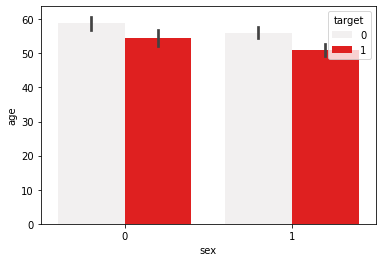

In [11]:
sns.barplot(df['sex'],df['age'],color='red',hue=df['target'])

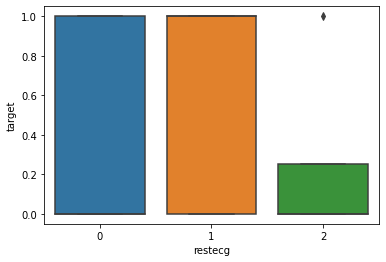

In [12]:
sns.boxplot(x="restecg",y="target",data=df)

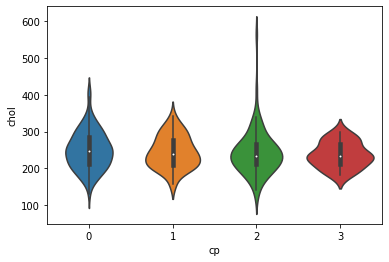

In [13]:
sns.violinplot(x="cp",y="chol",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Max heart rate of patients with heart disease')

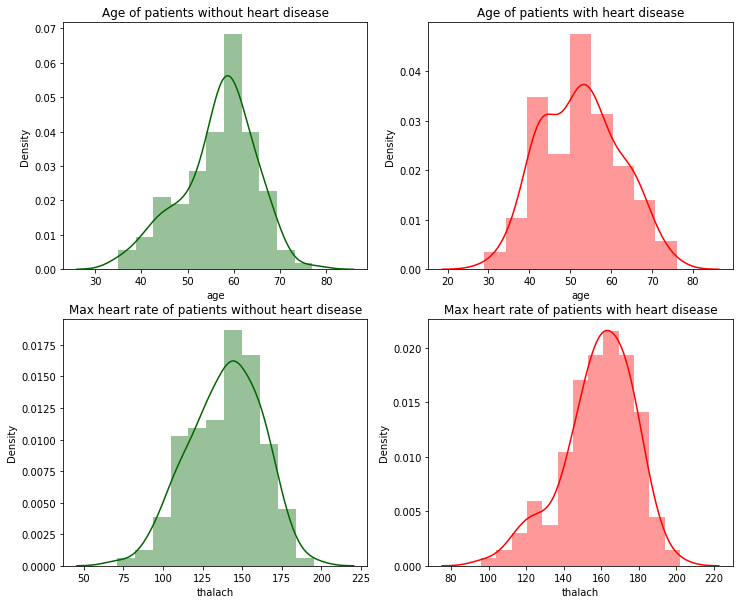

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age,color='darkgreen')
plt.title("Age of patients without heart disease")


plt.subplot(222)
sns.distplot(df[df['target']==1].age,color='red')
plt.title("Age of patients with heart disease")


plt.subplot(223)
sns.distplot(df[df['target']==0].thalach,color='darkgreen')
plt.title("Max heart rate of patients without heart disease")


plt.subplot(224)
sns.distplot(df[df['target']==1].thalach,color='red')
plt.title("Max heart rate of patients with heart disease")

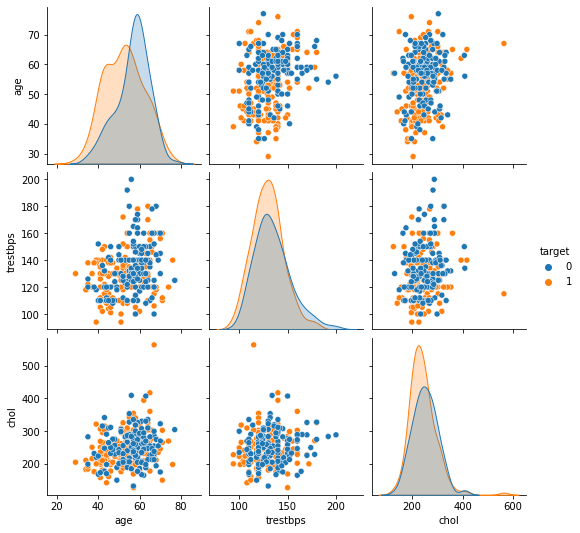

In [15]:
sns.pairplot(df,vars=["age","trestbps","chol"],hue='target')

# SPLITTING THE DATA

In [16]:
# checking the distribution of Target Variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
X = df.drop(columns='target', axis=1).values
Y = df['target'].values

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [20]:
def train_model(model, X_train, Y_train):
    model.fit(X_train, Y_train)
    return model
    
def test_model(model,X_test,Y_test):
  predictions = model.predict(X_test)
  accuracy = model.score(X_test, Y_test)
  metrics_report = classification_report(Y_test, predictions)
  precision, recall, fscore, train_support = score(Y_test, predictions, average='weighted')
  return predictions, accuracy, metrics_report, (precision, recall, fscore)

# FEATURE SCALING - STANDARDISATION

In [23]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler()
X_train = scaled_features.fit_transform(X_train)
X_test = scaled_features.transform(X_test)

# BASE LEARNERS

##### DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
# define the model
dt_model = DecisionTreeClassifier(random_state=42)

# fit the model
dt_model = train_model(dt_model, X_train, Y_train)
print(dt_model)

DecisionTreeClassifier(random_state=42)


##### LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(penalty='l2', max_iter=500) 
# fit the model
log_model= train_model(log_model, X_train,Y_train)
print(log_model)

LogisticRegression(max_iter=500)


##### SUPPORT VECTOR MACHINE

In [27]:
from sklearn.svm import SVC
svm_model= SVC(kernel = 'linear', random_state = 0)
svm_model = train_model(svm_model,X_train,Y_train)
print(svm_model)

SVC(kernel='linear', random_state=0)


##### K-NEAREST NEIGHBOR

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric='minkowski', p=1)
classifier = train_model(classifier,X_train,Y_train)
print(classifier)


KNeighborsClassifier(n_neighbors=8, p=1)


# ENSEMBLE METHODS

##### HARD VOTING

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
estimators = [('Decision Tree',dt_model),('Logistic Regression',log_model),('Support Vector Machine',svm_model),('KNN',classifier)]

ensemble_model = VotingClassifier(estimators=estimators,voting='hard')
ensemble_model = train_model(ensemble_model,X_train,Y_train)

##### GRADIENT BOOSTING

In [30]:
# define the model
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=10, random_state=2)
# fit the model
gb_model = train_model(gb_model, X_train,Y_train)
print(gb_model)

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=2)


# DIMENSIONALITY REDUCTION

##### PRINCIPLE COMPONENT ANALYSIS (PCA)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
X1_train = pca.fit_transform(X_train)
X1_test = pca.transform(X_test)
X1_train.shape

(242, 12)

##### LOGISTIC REGRESSION (PCA)

In [32]:
log_model_pca = LogisticRegression(penalty='l2', max_iter=500)
log_model_pca= train_model(log_model_pca, X1_train,Y_train)
print(log_model_pca)

LogisticRegression(max_iter=500)


##### DECISION TREE (PCA)

In [33]:
dt_model_pca = DecisionTreeClassifier(random_state=42)
dt_model_pca = train_model(dt_model_pca, X1_train, Y_train)
print(dt_model_pca)

DecisionTreeClassifier(random_state=42)


##### SVM (PCA)

In [34]:
svm_model_pca = SVC(kernel = 'linear', random_state = 0)
svm_model_pca = train_model(svm_model_pca,X1_train,Y_train)
print(svm_model_pca)

SVC(kernel='linear', random_state=0)


##### KNN (PCA)

In [35]:
classifier_pca = KNeighborsClassifier(n_neighbors = 8, metric='minkowski', p=1)
classifier_pca= train_model(classifier_pca,X1_train,Y_train)
print(classifier_pca)

KNeighborsClassifier(n_neighbors=8, p=1)


##### LINEAR DISCRIMINANT ANALYSIS (LDA)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components = 1)
X2_train = lda.fit_transform(X_train,Y_train)
X2_test = lda.transform(X_test)
X2_train.shape

(242, 1)

##### LOGISTIC REGRESSION (LDA)

In [ ]:
log_model_lda = LogisticRegression(penalty='l2', max_iter=500)
log_model_lda= train_model(log_model_lda, X2_train,Y_train)
print(log_model_lda)

LogisticRegression(max_iter=500)


##### DECISION TREE (LDA)

In [ ]:
dt_model_lda = DecisionTreeClassifier(random_state=42)
dt_model_lda = train_model(dt_model_lda, X2_train, Y_train)
print(dt_model_lda)

DecisionTreeClassifier(random_state=42)


##### SVM (LDA)

In [ ]:
svm_model_lda = SVC(kernel = 'linear', random_state = 0)
svm_model_lda = train_model(svm_model_lda,X2_train,Y_train)
print(svm_model_lda)

SVC(kernel='linear', random_state=0)


##### KNN (LDA)

In [ ]:
classifier_lda = KNeighborsClassifier(n_neighbors = 8, metric='minkowski', p=1)
classifier_lda= train_model(classifier_lda,X2_train,Y_train)
print(classifier_lda)

KNeighborsClassifier(n_neighbors=8, p=1)


# DEEP LEARNING

##### ARTIFICIAL NEURAL NETWORK (LDA)

In [ ]:
import tensorflow as tf
ann1= tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann1.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann1.compile(optimizer = 'adam',loss = 'binary_crossentropy' ,metrics = ['accuracy'])
ann1.fit(X2_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 2s 3ms/step - loss: 0.9092 - accuracy: 0.5455
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8573 - accuracy: 0.5496
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8131 - accuracy: 0.5455
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7793 - accuracy: 0.5496
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7495 - accuracy: 0.5496
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7223 - accuracy: 0.5537
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5496
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5702
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.7025
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.8554
Epoch 11/100
8/8 [===========

# COMPARISON OF MODELS

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import auc

##### DECISION TREE PREDICTION

accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


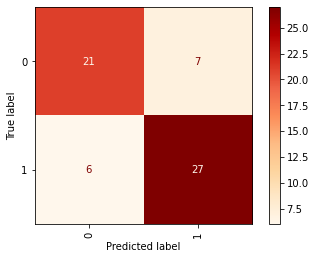

In [ ]:
# Predicting the Test set results - dt 
from sklearn.metrics import accuracy_score
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
dt_prf =(precision, recall, fscore)
print('accuracy: {}'.format(dt_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(dt_model,X_test,Y_test,xticks_rotation='vertical', cmap="OrRd")

In [ ]:
y_pred = dt_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### DECISION TREE PREDICTION WITH PCA

accuracy: 0.7377049180327869
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


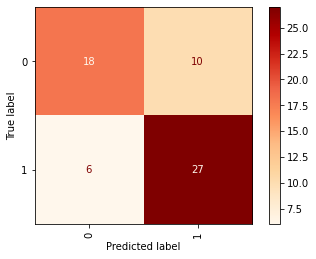

In [ ]:
# Predicting the Test set results - dt with pca
from sklearn.metrics import accuracy_score
y_pred = dt_model_pca.predict(X1_test)
dt_accuracy_pca = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
dt_pca_prf =(precision, recall, fscore)
print('accuracy: {}'.format(dt_accuracy_pca))
print('='*100)
print(metrics_report)
plot_confusion_matrix(dt_model_pca,X1_test,Y_test,xticks_rotation='vertical', cmap="OrRd")

In [ ]:
y_pred = dt_model_pca.predict(X1_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### DECISION TREE PREDICTION WITH LDA

accuracy: 0.7213114754098361
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        28
           1       0.77      0.70      0.73        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


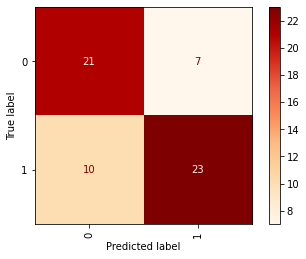

In [ ]:
# Predicting the Test set results - dt with LDA
from sklearn.metrics import accuracy_score
y_pred = dt_model_lda.predict(X2_test)
dt_accuracy_lda = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
dt_lda_prf =(precision, recall, fscore)
print('accuracy: {}'.format(dt_accuracy_lda))
print('='*100)
print(metrics_report)
plot_confusion_matrix(dt_model_lda,X2_test,Y_test,xticks_rotation='vertical', cmap="OrRd")

In [ ]:
y_pred = dt_model_lda.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### SVM PREDICTION 

accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


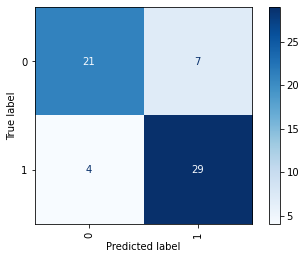

In [ ]:
# Predicting the Test set results - svm
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
svm_prf =(precision, recall, fscore)
print('accuracy: {}'.format(svm_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(svm_model,X_test,Y_test,xticks_rotation='vertical', cmap="Blues")

In [ ]:
y_pred = svm_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### SVM PREDICTION WITH PCA

accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


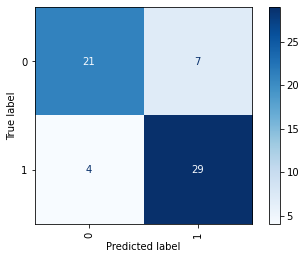

In [ ]:
# Predicting the Test set results - svm with pca
from sklearn.metrics import accuracy_score
y_pred = svm_model_pca.predict(X1_test)
svm_accuracy_pca = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
svm_pca_prf =(precision, recall, fscore)
print('accuracy: {}'.format(svm_accuracy_pca))
print('='*100)
print(metrics_report)
plot_confusion_matrix(svm_model_pca,X1_test,Y_test,xticks_rotation='vertical', cmap="Blues")

In [ ]:
y_pred = svm_model_pca.predict(X1_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### SVM PREDICTION WITH LDA

accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


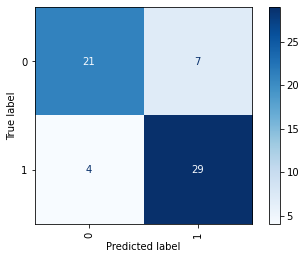

In [ ]:
# Predicting the Test set results - svm with lda
from sklearn.metrics import accuracy_score
y_pred = svm_model_lda.predict(X2_test)
svm_accuracy_lda = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
svm_lda_prf =(precision, recall, fscore)
print('accuracy: {}'.format(svm_accuracy_lda))
print('='*100)
print(metrics_report)
plot_confusion_matrix(svm_model_lda,X2_test,Y_test,xticks_rotation='vertical', cmap="Blues")

In [ ]:
y_pred = svm_model_lda.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### LOGISTIC REGRESSION PREDICTION

accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


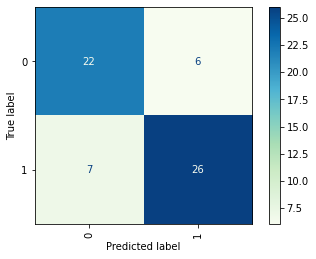

In [ ]:
# Predicting the Test set results - log 
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
log_prf =(precision, recall, fscore)
print('accuracy: {}'.format(log_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(log_model,X_test,Y_test,xticks_rotation='vertical', cmap="GnBu")

In [ ]:
y_pred = log_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### LOGISTIC REGRESSION WITH PCA

accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


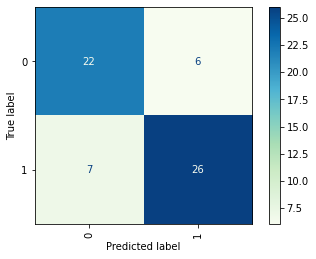

In [ ]:
# Predicting the Test set results - log with pca
from sklearn.metrics import accuracy_score
y_pred = log_model_pca.predict(X1_test)
log_pca_accuracy = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
log_pca_prf =(precision, recall, fscore)
print('accuracy: {}'.format(log_pca_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(log_model_pca,X1_test,Y_test,xticks_rotation='vertical', cmap="GnBu")

In [ ]:
y_pred = log_model_pca.predict(X1_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### LOGISTIC REGRESSION WITH LDA

accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


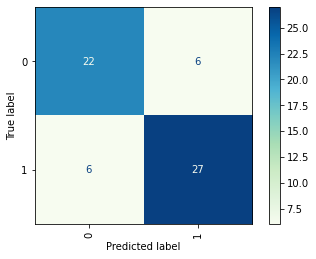

In [ ]:
# Predicting the Test set results - log with lda
from sklearn.metrics import accuracy_score
y_pred = log_model_lda.predict(X2_test)
log_lda_accuracy = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
log_lda_prf =(precision, recall, fscore)
print('accuracy: {}'.format(log_lda_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(log_model_lda,X2_test,Y_test,xticks_rotation='vertical', cmap="GnBu")

In [ ]:
y_pred = log_model_lda.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### KNN PREDICTION 

accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



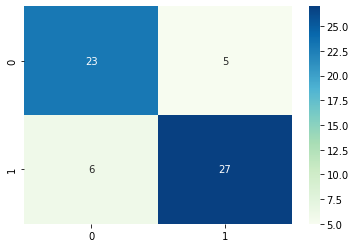

In [ ]:
# Predicting the Test set results - knn
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
knn_accuracy= accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
knn_prf =(precision, recall, fscore)
print('accuracy: {}'.format(knn_accuracy))
print('='*100)
print(metrics_report)
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### KNN PREDICTION WITH PCA

accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



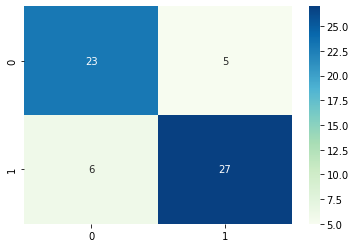

In [ ]:
# Predicting the Test set results - knn with pca
from sklearn.metrics import accuracy_score
y_pred = classifier_pca.predict(X1_test)
knn_accuracy_pca= accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
knn_pca_prf =(precision, recall, fscore)
print('accuracy: {}'.format(knn_accuracy_pca))
print('='*100)
print(metrics_report)
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")

In [ ]:
y_pred = classifier_pca.predict(X1_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### KNN PREDICTION WITH LDA

accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



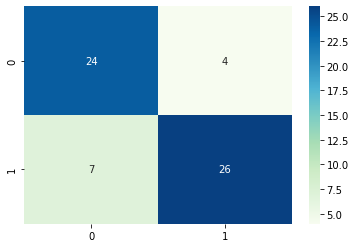

In [ ]:
# Predicting the Test set results - knn with lda
from sklearn.metrics import accuracy_score
y_pred = classifier_lda.predict(X2_test)
knn_accuracy_lda= accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
knn_lda_prf =(precision, recall, fscore)
print('accuracy: {}'.format(knn_accuracy_lda))
print('='*100)
print(metrics_report)
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")

In [ ]:
y_pred = classifier_lda.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### ANN PREDICTION WITH LDA

accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



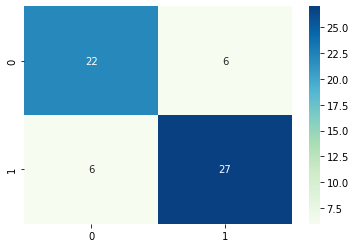

In [ ]:
# Predicting the Test set results - ann with lda
from sklearn.metrics import accuracy_score
y_pred = ann1.predict(X2_test)
y_pred = (y_pred > 0.5)
ann_accuracy_lda = accuracy_score(y_pred,Y_test)
metrics_report = classification_report(Y_test, y_pred)
precision, recall, fscore, train_support = score(Y_test, y_pred, average='weighted')
ann_lda_prf =(precision, recall, fscore)
print('accuracy: {}'.format(ann_accuracy_lda))
print('='*100)
print(metrics_report)
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")

In [ ]:
y_pred = ann1.predict(X2_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


GRADIENT BOOSTING PREDICTION

accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


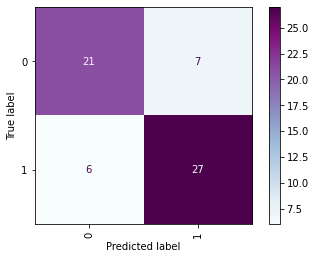

In [ ]:
predictions, gb_accuracy, metrics_report, gb_prf = test_model(gb_model, X_test, Y_test)
print('accuracy: {}'.format(gb_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(gb_model, X_test, Y_test, xticks_rotation='vertical', cmap="BuPu")

In [ ]:
y_pred = gb_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


##### HARD VOTING PREDICTION

accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


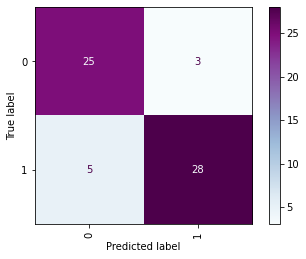

In [ ]:
predictions, hard_accuracy, metrics_report, hard_prf = test_model(ensemble_model, X_test, Y_test)
print('accuracy: {}'.format(hard_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(ensemble_model, X_test,Y_test, xticks_rotation='vertical', cmap="BuPu")

In [ ]:
y_pred = ensemble_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# MODEL EVALUATION

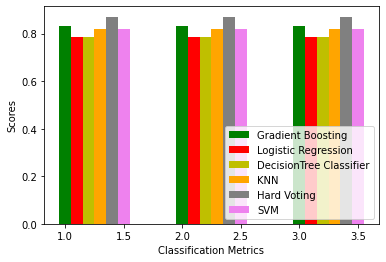

In [ ]:
# classification matric indices
xx = np.array([1,2,3])
width = 0.1
gb_prf = np.array([0.83, 0.83, 0.83])
ax = plt.subplot(111)
ax.bar(xx ,height=np.array(gb_prf), width=width, color='g', align='center', label='Gradient Boosting')
ax.bar(xx + 1*width, height=np.array(log_prf), width=width, color='r', align='center', label='Logistic Regression')
ax.bar(xx + 2*width, height=np.array(dt_prf), width=width, color='y', align='center', label='DecisionTree Classifier')
ax.bar(xx + 3*width, height=np.array(knn_prf), width=width, color='orange', align='center', label='KNN')
ax.bar(xx + 4*width, height=np.array(hard_prf), width=width, color='grey', align='center', label='Hard Voting')
ax.bar(xx + 5*width, height=np.array(svm_prf), width=width, color='violet', align='center', label='SVM')

plt.xlabel('Classification Metrics')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

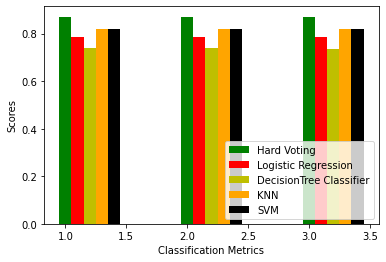

In [ ]:
# classification matric indices
xx = np.array([1,2,3])
width = 0.1
gb_prf = np.array([0.83, 0.83, 0.83])
ax = plt.subplot(111)
ax.bar(xx ,height=np.array(hard_prf), width=width, color='g', align='center', label='Hard Voting')
ax.bar(xx + 1*width, height=np.array(log_pca_prf), width=width, color='r', align='center', label='Logistic Regression')
ax.bar(xx + 2*width, height=np.array(dt_pca_prf), width=width, color='y', align='center', label='DecisionTree Classifier')
ax.bar(xx + 3*width, height=np.array(knn_pca_prf), width=width, color='orange', align='center', label='KNN')
ax.bar(xx + 4*width, height=np.array(svm_pca_prf), width=width, color='black', align='center', label='SVM')

plt.xlabel('Classification Metrics')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

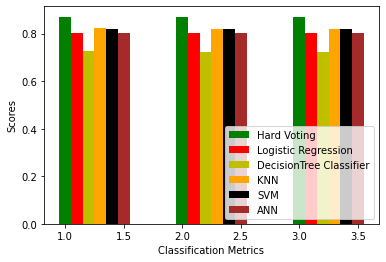

In [ ]:
xx = np.array([1,2,3])
width = 0.1
gb_prf = np.array([0.83, 0.83, 0.83])
ax = plt.subplot(111)
ax.bar(xx ,height=np.array(hard_prf), width=width, color='g', align='center', label='Hard Voting')
ax.bar(xx + 1*width, height=np.array(log_lda_prf), width=width, color='r', align='center', label='Logistic Regression')
ax.bar(xx + 2*width, height=np.array(dt_lda_prf), width=width, color='y', align='center', label='DecisionTree Classifier')
ax.bar(xx + 3*width, height=np.array(knn_lda_prf), width=width, color='orange', align='center', label='KNN')
ax.bar(xx + 4*width, height=np.array(svm_lda_prf), width=width, color='black', align='center', label='SVM')
ax.bar(xx + 5*width, height=np.array(ann_lda_prf), width=width, color='brown', align='center', label='ANN')

plt.xlabel('Classification Metrics')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cl_metric = pd.DataFrame(data = {"Models":[],"Precision":[],"recall":[],"f1-score":[],"accuracy_score":[]})
prfs=[("Logistic Regression",log_prf),("Logistic Regression (PCA)",log_pca_prf),
      ("Logistic Regression (LDA)",log_lda_prf),
      ("Support Vector Machine",svm_prf),("Support Vector Machine (PCA)",svm_pca_prf),
      ("Support Vector Machine (LDA)",svm_lda_prf),
      ("Decision Tree",dt_prf),("Decision Tree (PCA)",dt_pca_prf),("Decision Tree (LDA)",dt_lda_prf),
      ("ANN (LDA)",ann_lda_prf),
      ("Hard Voting",hard_prf),("Gradient Boosting",gb_prf),('KNN',knn_prf),('KNN (PCA)',knn_pca_prf),
      ('KNN (LDA)',knn_lda_prf)]
names=[]
pre=[]
rec=[]
f1=[]
ac=[log_accuracy,log_pca_accuracy,log_lda_accuracy,svm_accuracy,svm_accuracy_pca,
    svm_accuracy_lda,dt_accuracy,dt_accuracy_pca,dt_accuracy_lda,ann_accuracy_lda,
    hard_accuracy,gb_accuracy,knn_accuracy,knn_accuracy_pca,knn_accuracy_lda]
for name,(p,r,f) in prfs:
  names.append(name)
  pre.append(p)
  rec.append(r)
  f1.append(f)
cl_metric["Models"]=names
cl_metric["Precision"]=pre
cl_metric["recall"]=rec
cl_metric["f1-score"]=f1
cl_metric["accuracy_score"]=ac

In [ ]:
print(cl_metric.to_string(index=False))

                       Models  Precision    recall  f1-score  accuracy_score
          Logistic Regression   0.787769  0.786885  0.787115        0.786885
    Logistic Regression (PCA)   0.787769  0.786885  0.787115        0.786885
    Logistic Regression (LDA)   0.803279  0.803279  0.803279        0.803279
       Support Vector Machine   0.821366  0.819672  0.818489        0.819672
 Support Vector Machine (PCA)   0.821366  0.819672  0.818489        0.819672
 Support Vector Machine (LDA)   0.821366  0.819672  0.818489        0.819672
                Decision Tree   0.786617  0.786885  0.786538        0.786885
          Decision Tree (PCA)   0.739034  0.737705  0.735111        0.737705
          Decision Tree (LDA)   0.725701  0.721311  0.721761        0.721311
                    ANN (LDA)   0.803279  0.803279  0.803279        0.803279
                  Hard Voting   0.871144  0.868852  0.869064        0.868852
            Gradient Boosting   0.830000  0.830000  0.830000        0.786885